# Book Recommendation Project

## Project Overview
This project creates a **book recommendation system** based on user ratings. It suggests books similar to a given book using **cosine similarity** and **k-Nearest Neighbors (kNN)**.

---

## How the Project Works (Step-by-Step)

### 1. Collecting the Data
- Three datasets were used:  
  - **Book details** (titles, authors, publishers)  
  - **Users** (demographics and location)  
  - **Ratings** (how users rated different books)  

### 2. Cleaning and Preparing the Data
- Removed missing or invalid values.  
- Focused on **active users** (≥200 ratings).  
- Focused on **popular books** (≥50 ratings).  
- Filtered users from **USA and Canada**.  

### 3. Creating the User-Book Matrix
- Pivoted the table: **rows = books**, **columns = users**.  
- Missing ratings filled with **zeros**.  
- Converted the matrix to a **sparse format** for efficient computation.  

### 4. Using k-Nearest Neighbors (kNN)
- Applied **kNN algorithm** using `sklearn.neighbors.NearestNeighbors`.  
- **Metric:** cosine similarity  
- **Algorithm:** brute-force search  
- Fit the model on the sparse matrix of book ratings.  

### 5. Finding Recommendations
- Select a **query book** (or random book).  
- Extract its **rating vector**.  
- Use the kNN model to find **nearest neighbors**.  
- Display **top 5 similar books** with similarity scores.  

### 6. How It Works in Simple Terms
- Books rated similarly by many users are considered **similar**.  
- Recommendations show books that people with similar tastes also liked.  

### 7. Result
- Quickly generates **personalized book recommendations**.  
- Focused filtering ensures **quality and relevance** of recommendations.

---

## Detailed Book Recommendation Pipeline

```mermaid
flowchart TD
    A[Raw Data] --> B[Data Cleaning & Preprocessing]
    B --> C[Filter Active Users (≥200 ratings)]
    C --> D[Filter Popular Books (≥50 ratings)]
    D --> E[Filter Users from USA & Canada]
    E --> F[Create User-Book Matrix]
    F --> G[Convert to Sparse Matrix]
    G --> H[kNN Model with Cosine Similarity]
    H --> I[Select Query Book / Random Book]
    I --> J[Find Nearest Neighbor Books]
    J --> K[Display Top 5 Recommended Books]
```

**Legend / Notes:**
- **Raw Data:** BX-Books, BX-Users, BX-Book-Ratings  
- **Data Cleaning:** Remove NaNs, duplicates, invalid values  
- **Active Users:** Users with ≥200 ratings  
- **Popular Books:** Books with ≥50 ratings  
- **User-Book Matrix:** Rows = books, Columns = users, fill missing with 0  
- **kNN Model:** Uses `sklearn.neighbors.NearestNeighbors`, metric = cosine  
- **Recommendations:** Books with smallest cosine distance to the query book  

---

## Key Takeaways
- The system is **simple, efficient, and interpretable**.  
- Filtering ensures recommendations are **relevant and popular**.  
- Cosine similarity and kNN allow easy **item-based recommendations**.  


# Book Recommendation Project – Explained

Imagine you want to recommend books to users based on what other readers liked. Here’s how this project works:

## 1. Collecting the Data
- Three datasets were used:  
  - **Book details** (titles, authors, publishers)  
  - **Users** (who they are and where they live)  
  - **Ratings** (how users rated different books)  

## 2. Cleaning and Preparing the Data
- Removed missing or invalid values.  
- Focused on **active users** who rated many books.  
- Focused on **popular books** that had enough ratings.  
- Filtered users from **USA and Canada** for this example.  

## 3. Creating the User-Book Matrix
- Made a **matrix** where each row is a book and each column is a user.  
- Each cell shows the rating a user gave to that book.  
- Missing ratings were filled with **zeros**.  
- Converted this matrix into a **sparse format** for faster computation.  

## 4. Using k-Nearest Neighbors (kNN)
- Used a machine learning algorithm called **kNN**.  
- It finds **books that are similar** based on user ratings.  
- Used **cosine similarity**, which measures how similar two books are in terms of how users rated them.  

## 5. Finding Recommendations
- Pick a book you’re interested in (or select one randomly).  
- Look at its rating pattern across users.  
- kNN finds the **closest books** in terms of ratings.  
- Show the **top 5 similar books** along with a similarity score.  

## 6. How It Works in Simple Terms
- If many users rated Book A and Book B similarly, these books are considered **similar**.  
- The system recommends books **that people with similar tastes also liked**.  

## 7. Result
- Quickly recommends **popular books** that are most similar to any given book.  
- A simple yet powerful way to create **personalized book recommendations**.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the books dataset
# - Read all columns as string to avoid mixed dtype warning
# - Then convert 'yearOfPublication' to numeric
books = pd.read_csv(
    'BX-Books.csv',
    sep=';',
    on_bad_lines="skip",
    encoding="latin-1",
    dtype=str
)

# Rename columns for readability
books.columns = [
    'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication',
    'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'
]

# Convert 'yearOfPublication' to numeric (invalid values become NaN)
books['yearOfPublication'] = pd.to_numeric(books['yearOfPublication'], errors='coerce')

# Load the users dataset
users = pd.read_csv('BX-Users.csv', sep=';', on_bad_lines="skip", encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

# Load the ratings dataset
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', on_bad_lines="skip", encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [4]:
# Print the shape of the ratings dataset
# This shows (rows, columns) → i.e., how many ratings and fields exist
print(ratings.shape)

# Print the list of column names in the ratings dataset
# Helps confirm the dataset was loaded and renamed correctly
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


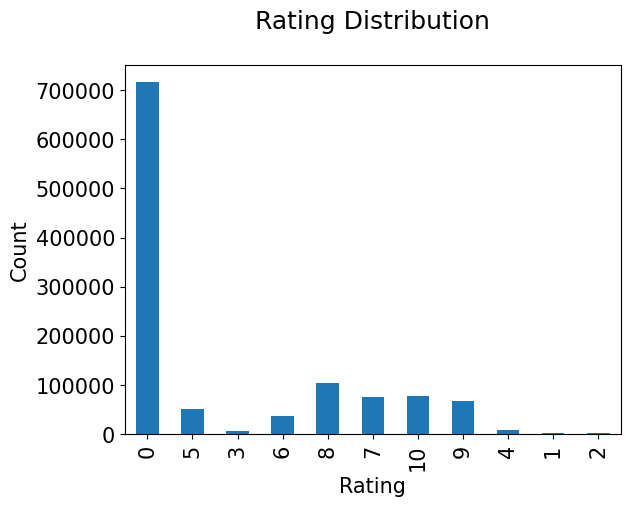

In [5]:
# Set the default font size for matplotlib plots
plt.rc("font", size=15)

# Plot the distribution of book ratings
# - value_counts(sort=False) → counts ratings without sorting (keeps natural order 0–10)
# - kind='bar' → creates a bar chart
ratings.bookRating.value_counts(sort=False).plot(kind='bar')

# Add a title to the chart
plt.title('Rating Distribution\n')

# Add labels for x and y axes
plt.xlabel('Rating')
plt.ylabel('Count')

# Save the plot as an image file
# - 'bbox_inches="tight"' removes extra white spaces around the plot
plt.savefig('system1.png', bbox_inches='tight')

# Display the plot
plt.show()

In [6]:
# Print the shape of the books dataset
# Output: (rows, columns) → number of book records and fields
print(books.shape)

# Print the list of column names in the books dataset
# Helps verify that columns were renamed correctly
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


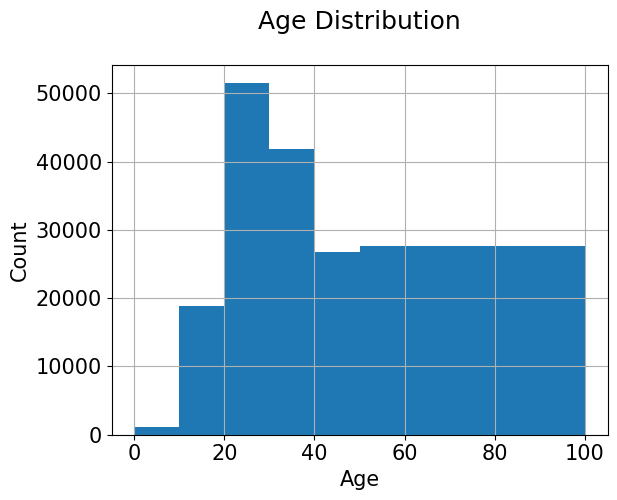

In [7]:
# Plot a histogram of user ages
# - bins specify the age ranges (0–10, 10–20, ... up to 100)
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])

# Add a title to the chart
plt.title('Age Distribution\n')

# Label the x-axis as Age
plt.xlabel('Age')

# Label the y-axis as Count (number of users in each age bin)
plt.ylabel('Count')

# Save the plot as an image file
# - bbox_inches="tight" removes extra whitespace
plt.savefig('system2.png', bbox_inches='tight')

# Display the plot
plt.show()

# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [8]:
# Count how many ratings each user has given
counts1 = ratings['userID'].value_counts()

# Keep only users who have rated at least 200 books
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

# Count how many times each rating value (0–10) occurs
counts = ratings['bookRating'].value_counts()

# Keep only ratings values (like 5, 6, 7, 8, etc.) that appear at least 100 times
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

# Collaborative Filtering Using k-Nearest Neighbors (kNN)

# kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [9]:
# Merge the ratings dataset with books dataset on the 'ISBN' column
# This combines user ratings with book details
combine_book_rating = pd.merge(ratings, books, on='ISBN')

# Columns that are not needed for the analysis
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']

# Drop unnecessary columns to simplify the dataset
combine_book_rating = combine_book_rating.drop(columns, axis=1)

# Display the first 5 rows of the combined dataset
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)


# We then group by book titles and create a new column for total rating count.

In [10]:
# Remove rows where 'bookTitle' is missing (NaN)
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

# Create a new DataFrame with the total number of ratings per book
book_ratingCount = (
    combine_book_rating
    .groupby(by=['bookTitle'])['bookRating']  # Group by book title
    .count()                                  # Count the number of ratings per book
    .reset_index()                            # Reset index to turn groupby result into a DataFrame
    .rename(columns={'bookRating': 'totalRatingCount'})  # Rename column for clarity
    [['bookTitle', 'totalRatingCount']]       # Select only relevant columns
)

# Display the first 5 rows of the book rating counts
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


# We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [11]:
# Merge the combined ratings dataset with the total rating counts per book
# - left_on and right_on are both 'bookTitle'
# - how='left' ensures all rows from combine_book_rating are kept
rating_with_totalRatingCount = combine_book_rating.merge(
    book_ratingCount,
    left_on='bookTitle',
    right_on='bookTitle',
    how='left'
)

# Display the first 5 rows of the merged dataset
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,7
2,277427,003008685X,8,Pioneers,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),13


In [12]:
# Set pandas display option to format floats with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Print summary statistics of the 'totalRatingCount' column
# - count: number of books
# - mean: average number of ratings per book
# - std: standard deviation
# - min, 25%, 50%, 75%, max: distribution of rating counts
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


# The median book has been rated only once. Let’s look at the top of the distribution

In [13]:
# Calculate and print the 90th to 99th percentiles of total ratings per book
# - np.arange(.9, 1, .01) creates percentiles 0.90, 0.91, ..., 0.99
# - This helps identify the most popular books
print(book_ratingCount['totalRatingCount'].quantile(np.arange(0.9, 1, 0.01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [14]:
# Define the minimum number of ratings a book must have to be considered "popular"
popularity_threshold = 50

# Filter the dataset to include only books with totalRatingCount >= popularity_threshold
# - Using query() allows referencing the variable with @
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')

# Display the first 5 rows of the filtered dataset
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,133
15,277427,0060934417,0,Bel Canto: A Novel,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108
24,277427,006440188X,0,The Secret Garden,79


In [15]:
# Print the shape of the filtered dataset with only popular books
# Output: (number of ratings, number of columns)
rating_popular_book.shape

(62149, 5)

# Filter to users in US and Canada only

In [16]:
# Merge the popular book ratings with the users dataset on 'userID'
# This adds user demographic information (Location, Age) to the ratings
combined = rating_popular_book.merge(users, left_on='userID', right_on='userID', how='left')

# Filter to keep only users from USA or Canada
# - str.contains with regex "usa|canada" (case-insensitive by default, can add flags=re.I if needed)
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada", case=False)]

# Drop the 'Age' column since it's not needed for this analysis
us_canada_user_rating = us_canada_user_rating.drop('Age', axis=1)

# Display the first 5 rows of the filtered dataset
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
2,277427,0060934417,0,Bel Canto: A Novel,108,"gilbert, arizona, usa"
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108,"gilbert, arizona, usa"
4,277427,006440188X,0,The Secret Garden,79,"gilbert, arizona, usa"


### Cosine Similarity Formula

For two vectors **A** and **B** (e.g., user ratings or item ratings):

Cosine Similarity:
cos(θ) = (A ⋅ B) / (||A|| * ||B||) 
        = (Σ(i=1 to n) A_i * B_i) / (√Σ(i=1 to n) A_i^2 * √Σ(i=1 to n) B_i^2)

Where:
- A ⋅ B → Dot product of the two vectors.
- ||A|| → Magnitude (length) of vector A.
- ||B|| → Magnitude (length) of vector B.

Result ranges from -1 to 1:
- 1 → perfectly similar
- 0 → orthogonal / no similarity
- -1 → perfectly opposite


## Implementing kNN

We first convert our table to a **2D matrix** and fill missing values with **zeros** (since we need to calculate distances between rating vectors).  
Next, we transform the values (ratings) of the matrix dataframe into a **SciPy sparse matrix** for more efficient computation.

### Finding the Nearest Neighbors

We use **unsupervised algorithms** from `sklearn.neighbors`.  

- The algorithm used to compute the nearest neighbors is `"brute"`.  
- We specify `metric="cosine"` so that the algorithm calculates **cosine similarity** between rating vectors.  
- Finally, we **fit the model** to the sparse matrix data.


In [21]:
# Import sparse matrix library
from scipy.sparse import csr_matrix

# Remove duplicate ratings (keep only one rating per user-book pair)
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])

# Pivot the dataframe to create a book-user matrix
# - Rows: bookTitle
# - Columns: userID
# - Values: bookRating
# - Missing ratings are filled with 0
us_canada_user_rating_pivot = us_canada_user_rating.pivot(
    index='bookTitle',
    columns='userID',
    values='bookRating'
).fillna(0)

# Convert the pivot table to a SciPy sparse matrix for efficient computation
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

# Import kNN model from scikit-learn
from sklearn.neighbors import NearestNeighbors

# Create the kNN model
# - metric='cosine' → use cosine similarity
# - algorithm='brute' → compute distances using brute-force search
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the kNN model on the sparse matrix
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
# Select the rating vector for a specific book using its row index (query_index)
query_vector = us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1)

# Display the vector to check its values
print(query_vector)

[[ 9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.
   0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [28]:
import numpy as np

# Randomly select a book row index from the pivot table
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print("Selected query index:", query_index)

# Select the rating vector for that book and reshape it to 2D
query_vector = us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1)

# Use the fitted kNN model to find the nearest neighbors
# - n_neighbors=6 → find the 5 most similar books plus the book itself
distances, indices = model_knn.kneighbors(query_vector, n_neighbors=6)

# distances → cosine distances between the query book and its neighbors
# indices → row indices of the nearest neighbor books in the pivot table
print("Distances:", distances)
print("Indices:", indices)

Selected query index: 392
Distances: [[0.         0.68458702 0.69505736 0.73643477 0.73785653 0.74836048]]
Indices: [[392 598 682 502 584 205]]


In [29]:
# Get the book title corresponding to the randomly selected query_index
# - us_canada_user_rating_pivot.index → contains all book titles (rows)
# - query_index → the randomly selected row index
query_book_title = us_canada_user_rating_pivot.index[query_index]

# Display the title of the book we are querying
print("Query book title:", query_book_title)

Query book title: Plainsong (Vintage Contemporaries)


In [30]:
# Loop over the distances and indices returned by kneighbors
for i in range(0, len(distances.flatten())):
    if i == 0:
        # The first entry is the query book itself
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        # Print each recommended book
        # - indices.flatten()[i] → row index of the recommended book
        # - distances.flatten()[i] → cosine distance to the query book
        print('{0}: {1}, with distance of {2:.3f}'.format(
            i,  # Recommendation number
            us_canada_user_rating_pivot.index[indices.flatten()[i]],  # Book title
            distances.flatten()[i]  # Cosine distance
        ))

Recommendations for Plainsong (Vintage Contemporaries):

1: The Little Friend, with distance of 0.685
2: Three Junes, with distance of 0.695
3: The Amazing Adventures of Kavalier &amp; Clay, with distance of 0.736
4: The Hours : A Novel, with distance of 0.738
5: Fingersmith, with distance of 0.748
